In [18]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix, f1_score
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3
from keras.models import Sequential, Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Adam

In [19]:
# Set the paths for your datasets
train_data_dir = '/content/drive/MyDrive/dataset2/dataset2/train'
validation_data_dir = '/content/drive/MyDrive/dataset2/dataset2/valid'
test_data_dir = '/content/drive/MyDrive/dataset2/dataset2/test'

In [20]:
# Parameters
img_width, img_height = 299, 299
batch_size = 32
epochs = 10

In [21]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [22]:
# Validation and Testing data should not be augmented
validation_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [23]:
# Load and augment training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

Found 1798 images belonging to 2 classes.


In [24]:
# Load validation data
val_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

Found 495 images belonging to 2 classes.


In [25]:
# Load test data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)

Found 441 images belonging to 2 classes.


In [26]:
#load InceptionV3 model without top layer
base_model = InceptionV3(weights='imagenet', include_top=False)

In [27]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, None, None, 32)       864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, None, None, 32)       96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, None, None, 32)       0         ['batch_normalizati

In [28]:
# Add new top layer for our dataset
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [29]:
# Combine base model with new top layer
model = Model(inputs=base_model.input, outputs=predictions)

In [30]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, None, None, 32)       864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, None, None, 32)       96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, None, None, 32)       0         ['batch_normalization_94

In [31]:
# Freeze layers of base model for feature extraction
for layer in base_model.layers:
    layer.trainable = False

In [42]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=[ 'accuracy'])


In [45]:
# Train the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // batch_size)

<ipython-input-45-6394ac1e0577>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
56/56 [==============================] - 470s 8s/step - loss: 0.1577 - accuracy: 0.9400
Epoch 2/10
56/56 [==============================] - 476s 8s/step - loss: 0.1498 - accuracy: 0.9496
Epoch 3/10
56/56 [==============================] - 471s 8s/step - loss: 0.1369 - accuracy: 0.9485
Epoch 4/10
56/56 [==============================] - 493s 9s/step - loss: 0.1421 - accuracy: 0.9451
Epoch 5/10
56/56 [==============================] - 478s 9s/step - loss: 0.1262 - accuracy: 0.9502
Epoch 6/10
56/56 [==============================] - 470s 8s/step - loss: 0.1151 - accuracy: 0.9570
Epoch 7/10
56/56 [==============================] - 468s 8s/step - loss: 0.1093 - accuracy: 0.9604
Epoch 8/10
56/56 [==============================] - 469s 8s/step - loss: 0.1028 - accuracy: 0.9638
Epoch 9/10
56/56 [==============================] - 484s 9s/step - loss: 0.1090 - accuracy: 0.9581
Epoch 10/10
56/56 [==============================] - 472s 8s/step - loss: 0.1002 - accuracy: 0.9666


In [46]:
# Print validation accuracy
val_loss , val_accuracy = model.evaluate_generator(validation_generator, steps=validation_generator.n // batch_size)
print("Validation Accuracy:", val_accuracy)
print("Validation Loss:", val_loss)

<ipython-input-46-2e85b2e79593>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  val_loss, val_accuracy = model.evaluate_generator(validation_generator, steps=validation_generator.n // batch_size)


Validation Accuracy: 0.8520833253860474
Validation Loss: 0.35806190967559814


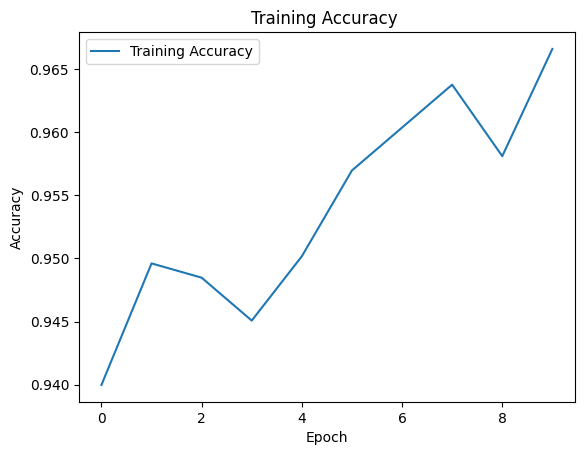

In [60]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

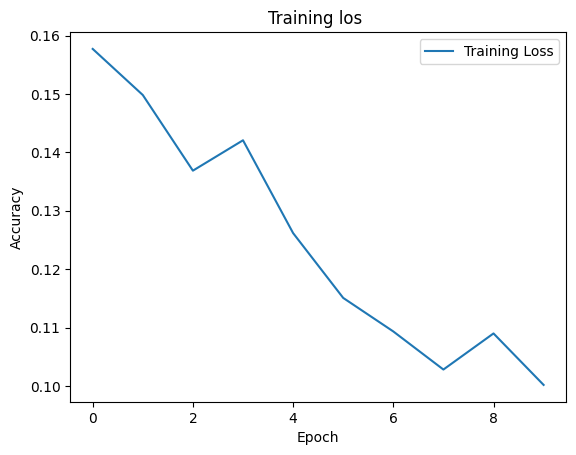

In [61]:
# Plot training and validation accuracy
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training los ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [79]:
# Evaluate the model
test_steps = test_generator.samples // batch_size + 1
predictions = model.predict(test_generator, steps=test_steps)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

14/14 [==============================] - 105s 7s/step


In [63]:
from sklearn.metrics import f1_score
# Calculate F1 score
f1 = f1_score(y_true, y_pred, average='macro')
# Print F1 score
print("F1 Score:", f1)

F1 Score: 0.20825852782764812


In [80]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[116   0]
 [325   0]]


In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define class names based on your dataset
class_names = ['Melanoma Skin Cancer Nevi and Moles', 'Tinea Ringworm Candidiasis and other Fungal Infections']


In [88]:
# Assuming model is your trained neural network model and validation_generator is your validation data generator

# Obtain raw predictions for the validation set
y_pred = model.predict_generator(validation_generator)

# Calculate probabilities by applying softmax function
# If it's a binary classification problem, use sigmoid activation instead
# Assuming y_pred has shape (num_samples, num_classes)
# For binary classification, num_classes should be 1
import numpy as np
y_pred_prob = np.exp(y_pred) / np.sum(np.exp(y_pred), axis=1, keepdims=True)



<ipython-input-88-6041c1faf2f1>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(validation_generator)


In [94]:

# Print the shapes of y_true and y_pred_prob_positive
print("Shape of y_true:", y_true.shape)
print("Shape of y_pred_prob:", y_pred_prob.shape)

Shape of y_true: (441,)
Shape of y_pred_prob: (495, 1)


In [95]:
y_pred_prob = y_pred_prob[:441]

In [96]:
from sklearn.metrics import f1_score
import numpy as np

# Assuming y_true and y_pred_prob_positive are your true labels and predicted probabilities for the positive class
# Define a range of thresholds to try
thresholds = np.arange(0, 1, 0.01)
best_f1 = 0
best_threshold = 0

# Iterate over each threshold and compute the F1 score
for threshold in thresholds:
    y_pred = (y_pred_prob >= threshold).astype(int)
    f1 = f1_score(y_true, y_pred)

    # Keep track of the best F1 score and corresponding threshold
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print("Best F1 Score:", best_f1)
print("Best Threshold:", best_threshold)


Best F1 Score: 0.8485639686684073
Best Threshold: 0.0


In [72]:
# Assuming you have trained the model using the code snippet provided
# You can access the final training and validation accuracy from the history object

# Get the final training and validation accuracy

final_training_accuracy = history.history['accuracy'][-1]
# Print the final training and validation accuracy
print("Final Training Accuracy:", final_training_accuracy)


Final Training Accuracy: 0.9665911793708801
